In [1]:
# Some basic imports
import os
import pandas as pd
import numpy as np
from tabulate import tabulate

# specific imports
from shutil import rmtree
from matplotlib.pylab import plt
from scipy import stats

# The important Kallysto imports.
from kallysto.publication import Publication
from kallysto.export import Export
from kallysto.formatter import Latex, Markdown
import kallysto.markdown

In [2]:
os.chdir('..')
os.getcwd()

'/Users/mollyq/Documents/GitHub/Control_and_Valence_in_Unexpected_Events'

In [3]:
# place to house the output data (graphs, etc...)
!tree 3_output

zsh:1: command not found: tree


In [4]:
# Create a link between this notebook and the target publication (a_report)
latex_report = Publication(
    notebook='1_Pre_Test.ipynb',  # Current notebook name
    title='control_report',     # Publication name
    pub_path='3_output/',         # Location of publication project relative to this notebook.
    formatter=Latex,          # Default publictaion format; Markdown can also be used.
    
    overwrite=True,           # Overwrite any existing exports if they exist.
    fresh_start=False          # Delete log and include files if they exist.
)

# Pre-Test Design

In [5]:
#lists of combinations for greco-latin square counterbalance design. Taken from Zeelenberg & Pecher, 2014.
LGs1r1 = ["A1", "C3", "B2", "D4"]
LGs1r2 = ["B3", "A4", "D1", "C2"]
LGs1r3 = ["C2", "D1", "A4", "B3"]
LGs1r4 = ["D4", "B2", "C3", "A1"]

LGs2r1 = ["D2", "B1", "C4", "A3"]
LGs2r2 = ["C1", "D3", "A2", "B4"]
LGs2r3 = ["B4", "A2", "D3", "C1"]
LGs2r4 = ["A3", "C4", "B1", "D2"]

#Where:
condition_assignments = pd.DataFrame.from_dict(
    
    {'Means Present': {"Negative": 'A', 'Positive': 'C'},
     
     'Means Absent': {"Negative": 'B', 'Positive': 'D'}
    }
)

#and:

pre_test_material_subsets = pd.DataFrame.from_dict(
    {'Subset 1': {0: 'steve_gardening', 1: 'louise_shopping', 2: 'alan_plane', 3: 'edith_exam', 4: 'mary_food'},
     
     'Subset 2': {0: 'rebecca_swimming', 1: 'sally_wine', 2: 'karen_bus', 3: 'bob_job', 4: 'bill_holiday'},
     
     'Subset 3': {0: 'katie_kitten', 1: 'lucy_loan', 2: 'belinda_meeting', 3: 'peter_college', 4: 'john_party'},
     
     'Subset 4': {0: 'sean_call', 1: 'sam_driving', 2: 'michael_tea', 3: 'robert_essay', 4: 'anna_interview'}
    }
)

#Print for report.
string = "Pre-Test Methods"
print(string.center(100))
print()
print("""Latin Square Design: 20 Materials x 2 Control (Present/Absent) x 2 Valence (Positive/Negative) x 
2 Question Types (Control/Valence)
""")
print("""The 20 materials were divided into four subsets of 5 materials each deliberately chosen to divide
materials with similar themes such as shopping or travelling equally into each subset.""")
print(tabulate(pre_test_material_subsets, headers="keys", tablefmt='fancy_grid'))
print()
print("""The material subsets were then assigned to four different condition combinations by Control (Means 
Present, Absent) and by Valence (Positive/Negative).""")
print(tabulate(condition_assignments, headers="keys", tablefmt='fancy_grid'))
print()
print("""The following are the Graeco-Latin squares used to counterbalance material subsets assignment to the four 
condition-combinations in the pretest and main study. This design has been shown to remove both remote and 
immediate sequence effects where both condition order and material assignment should be counterbalanced (Zeelenberg 
& Pecher, 2014).""")
print()
print(tabulate([LGs1r1, LGs1r2, LGs1r3, LGs1r4], tablefmt='fancy_grid'))
print()
print(tabulate([LGs2r1, LGs2r2, LGs2r3, LGs2r4], tablefmt='fancy_grid'))
print()
print("""Participants (N = 64) were randomly assigned to the counterbalanced subsets. 
Materials were randomly presented within their respective blocks. 
The Controllability and Valence questions were counterbalanced.""")

                                          Pre-Test Methods                                          

Latin Square Design: 20 Materials x 2 Control (Present/Absent) x 2 Valence (Positive/Negative) x 
2 Question Types (Control/Valence)

The 20 materials were divided into four subsets of 5 materials each deliberately chosen to divide
materials with similar themes such as shopping or travelling equally into each subset.
╒════╤═════════════════╤══════════════════╤═════════════════╤════════════════╕
│    │ Subset 1        │ Subset 2         │ Subset 3        │ Subset 4       │
╞════╪═════════════════╪══════════════════╪═════════════════╪════════════════╡
│  0 │ steve_gardening │ rebecca_swimming │ katie_kitten    │ sean_call      │
├────┼─────────────────┼──────────────────┼─────────────────┼────────────────┤
│  1 │ louise_shopping │ sally_wine       │ lucy_loan       │ sam_driving    │
├────┼─────────────────┼──────────────────┼─────────────────┼────────────────┤
│  2 │ alan_plane      │ k

In [6]:
# Export material subsets table.
pre_test_material_subsets = Export.table('PreTestMaterialSubsets', 
             data=pre_test_material_subsets,
             caption='Material subsets used in the pre-test to Experiment 1.'
) 
# Transfer the export to the latex report.
pre_test_material_subsets > latex_report

#Export the condition assignments table.
condition_assignments_latex = Export.table('ConditionAssignments', 
             data=condition_assignments,
             caption='Material Conditions Experiment 1.'
) 
# Transfer the export to the latex report.
condition_assignments_latex > latex_report

## Trouble getting the G-L Squares into the right format...
# #Export the Greco-Latin Squares.
# pre_test_gl_square1 = Export.table('PreTestGrecoLatinSquare1', 
#              data=[LGs1r1, LGs1r2, LGs1r3, LGs1r4],
#              caption='Pre-Test Greco-Latin Square 1.'
# ) 
# pre_test_gl_square2 = Export.table('PreTestGrecoLatinSquare2', 
#              data=[LGs2r1, LGs2r2, LGs2r3, LGs2r4],
#              caption='Pre-Test Greco-Latin Square 2.'
# ) 
# # Transfer the exports to the latex report.
# pre_test_gl_square1 > latex_report
# pre_test_gl_square2 > latex_report


# View updated data store
!tree 3_output

zsh:1: command not found: tree


# Pre-Test Data Prep

## Read in Results from the 16 Pre-Test SurveyGizmo Files

In [7]:
# read in the files with the material sets defined by the latin squares above
pre_test_path = '0_data/1_pre_test_data/0_raw_data/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_data_files = os.listdir(pre_test_path)

#check
print(list_of_data_files)


['MQ_PTS4_LGs1r3_vc_20200513075117-SurveyExport.csv', 'MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv', 'MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv', 'MQ_PTS4_LGs2r2_cv_20200513075402-SurveyExport.csv', 'raw_data.txt', 'MQ_PTS4_LGs2r1_vc_20200513075324-SurveyExport.csv', 'MQ_PTS4_LGs1r2_vc_20200513072644-SurveyExport.csv', 'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv', 'MQ_PTS4_LGs2r1_cv_20200513075241-SurveyExport.csv', 'MQ_PTS4_LGs2r4_vc_20200513075649-SurveyExport.csv', 'MQ_PTS4_LGs1r3_cv_20200513073919-SurveyExport.csv', 'MQ_PTS4_LGs1r4_vc_20200514061658-SurveyExport.csv', 'MQ_PTS4_LGs2r3_vc_20200513075544-SurveyExport.csv', 'MQ_PTS4_LGs1r2_cv_20200513071301-SurveyExport.csv', 'MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv', 'MQ_PTS4_LGs1r4_cv_20200514060644-SurveyExport.csv', 'MQ_PTS4_LGs2r3_cv_20200513075508-SurveyExport.csv']


In [8]:
#select only .csv files
csv_list = [] #to keep file names
dict_of_files = {} #to keep dataframes

for filename in list_of_data_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_files[filename] = pd.read_csv(pre_test_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

#check
#print('\n', csv_list, '\n')
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

This is not a .csv file and will be discarded:  raw_data.txt


### Missing values create all sorts of trouble down the line, so I am replacing them for all DataFrames with the unlikeliest of numbers: -9999.

In [9]:
for dataframe in dict_of_files:
    dict_of_files[dataframe].fillna(-9999, inplace = True)

#check one of the files that showed problems
dict_of_files['MQ_PTS4_LGs1r3_cv_20200513073919-SurveyExport.csv']

,Response ID,Time Started,Date Submitted,Status,Contact ID,Legacy Comments,Comments,Language,Referer,SessionID,...,lucy_loan.valence,peter_college.q1,peter_college.control,peter_college.valence,katie_kitten.q1,katie_kitten.control,katie_kitten.valence,Have you taken part in a similar study before?,Are there any comments you have about this survey or anything you would like us to know?,Prolific URL Redirect
0,1,"May 8, 2020 5:59:26 am","May 8, 2020 6:11:50 am",Complete,-9999.0,-9999.0,-9999.0,English,-9999.0,1588931966_5eb52d7ea5f7f8.59907965,...,Neutral,To get to a lecture on time,Controllable,Somewhat Negative,Her lost kitten,Somewhat Uncontrollable,Very Negative,No,-9999,-9999.0
1,2,"May 8, 2020 6:00:46 am","May 8, 2020 6:19:11 am",Complete,-9999.0,-9999.0,-9999.0,English,-9999.0,1588932045_5eb52dcdd75ee3.11888449,...,Somewhat Negative,To get to a lecture on time,Uncontrollable,Negative,Her lost kitten,Uncontrollable,Negative,No,Nothing I can think of,-9999.0
2,3,"May 8, 2020 6:02:49 am","May 8, 2020 6:12:15 am",Complete,-9999.0,-9999.0,-9999.0,English,-9999.0,1588932169_5eb52e49b37f21.99687573,...,Neutral,to be on time for a lecture,Somewhat Controllable,Neutral,her lost kitten,Somewhat Controllable,Neutral,No,-9999,-9999.0
3,4,"May 8, 2020 6:06:04 am","May 8, 2020 6:18:02 am",Complete,-9999.0,-9999.0,-9999.0,English,-9999.0,1588932364_5eb52f0cd7c027.36514996,...,Somewhat Negative,To attend a lecture on time.,Somewhat Controllable,Somewhat Negative,Her lost kitten.,Somewhat Controllable,Somewhat Negative,No,Nope,-9999.0


### I accidentally ran the first two surveys without the practice Qs, so I need to remove any test users and the first participants run without the practice Qs. I will do this by date, individually for each file.

#### 'MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'

In [10]:
#if "Time Started" contains "May 7th" (the date of running the updated/fixed survey), keep it.
dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'] = dict_of_files[
    'MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'][dict_of_files[
    'MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv']["Time Started"].str.contains("May 7")]


In [11]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv']

#### 'MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv'

In [12]:
dict_of_files['MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv'] = dict_of_files[
    'MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv'][dict_of_files[
    'MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv']["Time Started"].str.contains("May 7")]


In [13]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_vc_20200513063411-SurveyExport.csv']

### I also need to exclude the participant from 'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv' who answered 95% of Qs with "Neutral" which appeared to be a click-through rather than legitimate engagement in the study.

In [14]:
dict_of_files['MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv'] = dict_of_files[
    'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv'][dict_of_files[
    'MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv']['Response ID']!=4]

In [15]:
#check
#dict_of_files['MQ_PTS4_LGs2r4_cv_20200513075615-SurveyExport.csv']

### Add in the information about which survey it is from the filename.

In [16]:
#separate file on _underscores_ and add that info to the columns
col_n_list = ["MQ", "expt", "lg", "order", "surveygizmo_export_filename"]

for csv_filename in csv_list:
    for col_n, field_n in zip(col_n_list, csv_filename.split("_")):
        dict_of_files[csv_filename][col_n] = field_n

#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

## Take each dataframe and format for merging...


#### Firstly, reshape the dataframes to one line per question.

In [17]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

In [18]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].columns

In [19]:
for dataframe in dict_of_files:
    dict_of_files[dataframe] = dict_of_files[dataframe].melt(
                 id_vars = ['MQ', 'expt', 'lg', 'order', 'surveygizmo_export_filename',
                            'Response ID','Time Started','Date Submitted',
                            'Status','Contact ID','Legacy Comments','Comments',
                            'Language','Referer','SessionID', 'user_id'
                           ]
                )

#check
#dict_of_files['MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv'].head()

#### Secondly, split the questions from the material names.

In [20]:
for dataframe in dict_of_files:
    new = dict_of_files[dataframe]['variable'].str.split(".", expand = True) 
    # making separate first name column from new data frame 
    dict_of_files[dataframe]["material"]= new[0] 

    # making separate last name column from new data frame 
    dict_of_files[dataframe]["variable_condition"]= new[1] 

#check df display 
#dict_of_files['MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv'].head()

#### Thirdly, put each question in its own column and have each material as its own row (repeated for each username)

In [21]:
for dataframe in dict_of_files:
    dict_of_files[dataframe] = dict_of_files[dataframe].groupby(['MQ', 'expt', 'lg', 'order', 'surveygizmo_export_filename',
                        'Response ID','Time Started','Date Submitted',
                        'Status',#'Contact ID', #'Legacy Comments', #'Comments',
                        'Language','SessionID', 'user_id', 
                        'material', 'variable_condition']
                       #the fields above that are commented out are all "NaN" and, therefore, ommited.
                      )['value'].first().unstack('variable_condition').reset_index()

#check
#dict_of_files['MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv'].head()
dict_of_files['MQ_PTS4_LGs1r3_cv_20200513073919-SurveyExport.csv'].loc[(
    dict_of_files['MQ_PTS4_LGs1r3_cv_20200513073919-SurveyExport.csv']['material'] == 'belinda_meeting')]

variable_condition,MQ,expt,lg,order,surveygizmo_export_filename,Response ID,Time Started,Date Submitted,Status,Language,SessionID,user_id,material,control,q1,valence
2,MQ,PTS4,LGs1r3,cv,20200513073919-SurveyExport.csv,1,"May 8, 2020 5:59:26 am","May 8, 2020 6:11:50 am",Complete,English,1588931966_5eb52d7ea5f7f8.59907965,5c7ec6195fce1600133594a5,belinda_meeting,Somewhat Uncontrollable,For a business meeting,Negative
24,MQ,PTS4,LGs1r3,cv,20200513073919-SurveyExport.csv,2,"May 8, 2020 6:00:46 am","May 8, 2020 6:19:11 am",Complete,English,1588932045_5eb52dcdd75ee3.11888449,5d6daef128772d0017e8d743,belinda_meeting,Uncontrollable,To attend a business meeting,Neutral
46,MQ,PTS4,LGs1r3,cv,20200513073919-SurveyExport.csv,3,"May 8, 2020 6:02:49 am","May 8, 2020 6:12:15 am",Complete,English,1588932169_5eb52e49b37f21.99687573,57c1ab62ffd38700010b4637,belinda_meeting,Somewhat Controllable,for a business meeting,Neutral
68,MQ,PTS4,LGs1r3,cv,20200513073919-SurveyExport.csv,4,"May 8, 2020 6:06:04 am","May 8, 2020 6:18:02 am",Complete,English,1588932364_5eb52f0cd7c027.36514996,5e9dfc8eeb,belinda_meeting,Somewhat Controllable,For a business meeting.,Somewhat Negative


## Add in the Condition information from the material subsets files used to create the survey(s).

### load in the pre-test materials excel files

In [22]:
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

In [23]:
# read in the files with the material sets defined by the latin squares above
material_sets_path = '0_data/0_material_sets/pre_test_material_sets/'

#Documents/Studies/Expt4_Controllability/Data/pre_test_data
list_of_materials_files = os.listdir(material_sets_path)

#check
#print(list_of_materials_files)


In [24]:
csv_list_materials = [] #to keep file names
dict_of_materials_files = {} #to keep dataframes

for filename in list_of_materials_files:
    
    #filter out the non-csvs at this step
    if filename.endswith(".csv"):
        #save csv filenames to add in data later
        csv_list_materials.append(filename)
        #read in csvs as pandas DataFrames
        dict_of_materials_files[filename] = pd.read_csv(material_sets_path + filename)
    else:
        print("This is not a .csv file and will be discarded: ", filename)

#check
#print('\n', csv_list_materials, '\n')

#dict_of_materials_files['LGs1r1.csv'].head()


This is not a .csv file and will be discarded:  LGs2r3.xlsx
This is not a .csv file and will be discarded:  LGs2r2.xlsx
This is not a .csv file and will be discarded:  LGs1r1.xlsx
This is not a .csv file and will be discarded:  LGs2r4.xlsx
This is not a .csv file and will be discarded:  LGs1r2.xlsx
This is not a .csv file and will be discarded:  LGs1r3.xlsx
This is not a .csv file and will be discarded:  LGs1r4.xlsx
This is not a .csv file and will be discarded:  LGs2r1.xlsx


### Merge with the survey output data on material_name and Latin-Greco level.

In [25]:
for dataframe in dict_of_files:
    for material_file in dict_of_materials_files:
        material_LG = material_file.split('.')
        if dict_of_files[dataframe]['lg'][0] in material_LG[0]:
            dict_of_files[dataframe] = pd.merge(dict_of_files[dataframe], 
                                                dict_of_materials_files[material_file], 
                                                on = 'material')
            
#check
#dict_of_files['MQ_PTS4_LGs1r1_cv_20200513062426-SurveyExport.csv'].head()

### Now, I need one dataframe with all of the cleaned and merged data inside it.

In [26]:
# check why concatenating was throwing a warning for sorting the columns that should have all been the same...
temp_columns = dict_of_files['MQ_PTS4_LGs1r3_vc_20200513075117-SurveyExport.csv'].columns.tolist()
for key, tdf in dict_of_files.items():
    if tdf.columns.tolist() != temp_columns:
        print(key)
        print(tdf.columns)
        print(temp_columns)
        
#check 'MQ_PTS4_LGs2r1_cv_20200513075241-SurveyExport.csv' -- one "valence" column was named "negative"
# and 'MQ_PTS4_LGs2r2_vc_20200513075436-SurveyExport.csv' -- one "control" column was named "controllable"

In [27]:
pre_test_data = pd.concat(dict_of_files.values(), axis = 0, ignore_index=True)

#check
#pre_test_data

In [28]:
pre_test_data['material'].nunique()

20

#### Save a .csv of the pre-test data.

In [29]:
# pre_test_data.to_csv("pre_test_data.csv")

# Pre-Test Data Analysis

## Overall spread of frequencies of responses.

From the overall counts of valence responses, it appears that the valence manipulation worked for at least a majority of materials. However, the controllability responses do not appear to have worked as well. The means_absent manipulation has somewhat shifted the responses to the more "uncontrollable" side of the likert scale, but they still seem more similar to the means_present manipulation which people appear to agree is mostly controllable.

valence,Very Negative,Negative,Somewhat Negative,Neutral,Somewhat Positive,Positive,Very Positive
valence_condition,,,,,,,
negative,67,166,230,97,49,24,0
positive,2,23,78,82,135,206,108


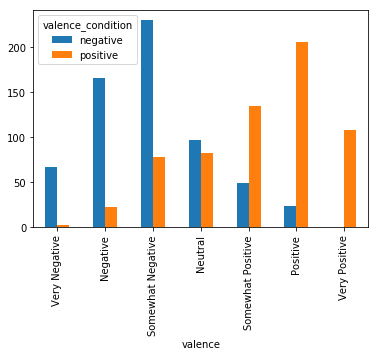

In [30]:
valence_order = ['Very Negative', 'Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive', 'Very Positive']

#Make a graph
pre_test_data.groupby(['valence_condition'])['valence'].value_counts().unstack(0).loc[valence_order].plot.bar()

#print the data
pd.crosstab(pre_test_data['valence_condition'], pre_test_data['valence']).reindex(valence_order, axis="columns")

control,Completely Uncontrollable,Uncontrollable,Somewhat Uncontrollable,Neutral,Somewhat Controllable,Controllable,Completely Controllable
means_condition,,,,,,,
absent,20,85,131,48,158,138,51
present,6,48,78,48,191,193,71


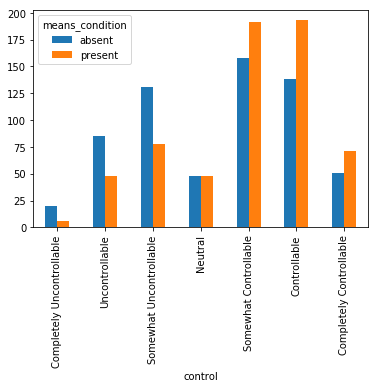

In [31]:
control_order = ['Completely Uncontrollable', 'Uncontrollable', 'Somewhat Uncontrollable', 'Neutral',
                 'Somewhat Controllable', 'Controllable', 'Completely Controllable']

#Make a graph
pre_test_data.groupby(['means_condition'])['control'].value_counts().unstack(0).loc[control_order].plot.bar()

#print the data
pd.crosstab(pre_test_data['means_condition'], pre_test_data['control']).reindex(control_order, axis="columns")

### Breakdown by both means (control) and valence manipulated DVs.

**Valence Ratings.**  However, when you break it down by both control and valence, a possible interaction arises in the valence ratings participants gave. The combinations of positive & means present and negative & means absent seemed to work the best. When materials were positive and means were present, people rated the materials highly positive; when materials were negative and means were absent, people rated the materials mostly negative. 

The materials that were crossed (the positive materials with means absent and the negative materials and means present) do not appear to work as well. They are more spread out and closer to neutral, however both appear to have a central tendency to the positive or negative side of the scale, as expected.

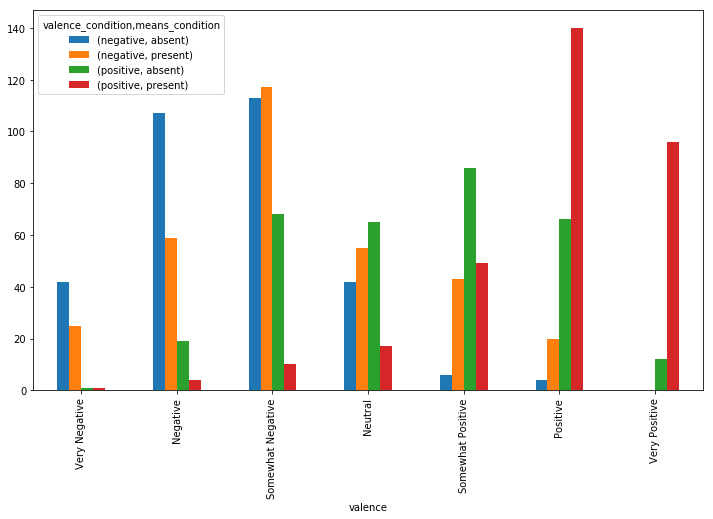

In [32]:
pre_test_data.groupby(['valence_condition', 'means_condition'])['valence'].value_counts().unstack([0,1]).loc[valence_order].plot.bar(figsize = (12,7))


In [33]:
#Group by both valence and control.
pre_test_data.groupby(['valence_condition', 'means_condition'])['valence'].value_counts().unstack(2).reindex(
    valence_order, axis="columns")

valence                            Very Negative  Negative  Somewhat Negative  \
valence_condition means_condition                                               
negative          absent                    42.0     107.0              113.0   
                  present                   25.0      59.0              117.0   
positive          absent                     1.0      19.0               68.0   
                  present                    1.0       4.0               10.0   

valence                            Neutral  Somewhat Positive  Positive  \
valence_condition means_condition                                         
negative          absent              42.0                6.0       4.0   
                  present             55.0               43.0      20.0   
positive          absent              65.0               86.0      66.0   
                  present             17.0               49.0     140.0   

valence                            Very Positive  
valence_condition means_condition                 
negative          absent                     NaN  
                  present                    NaN  
positive          absent                    12.0  
                  present                   96.0

**Controllability Ratings.**  The controllability ratings are less distinct, as participants seemed to agree that all of the scenarios were, more or less, controllable. Again, the positive materials with means present were the most strongly rated controllable. The other three DV pairings seem to be rated more similarly, all having their medians on "Somewhat Controllable".

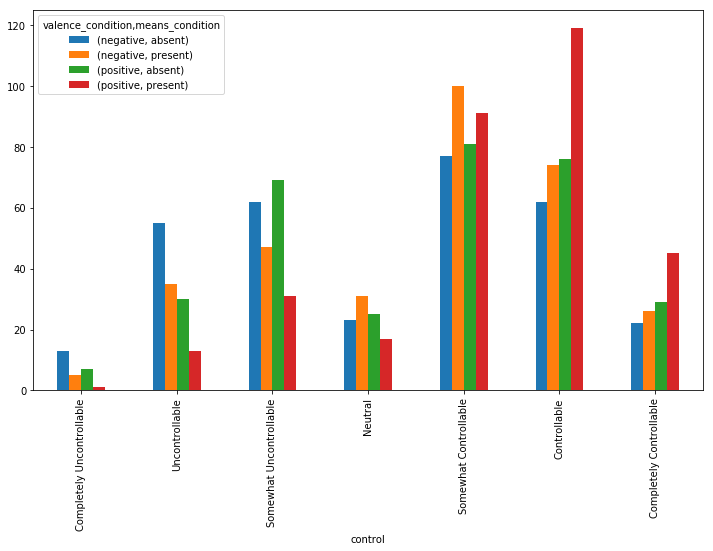

In [34]:
pre_test_data.groupby(['valence_condition', 'means_condition'])['control'].value_counts().unstack([0,1]).loc[control_order].plot.bar(figsize = (12,7))


In [35]:
#Group by both valence and control.
pre_test_data.groupby(['valence_condition', 'means_condition'])['control'].value_counts().unstack(2).reindex(
    control_order, axis="columns")

control                            Completely Uncontrollable  Uncontrollable  \
valence_condition means_condition                                              
negative          absent                                  13              55   
                  present                                  5              35   
positive          absent                                   7              30   
                  present                                  1              13   

control                            Somewhat Uncontrollable  Neutral  \
valence_condition means_condition                                     
negative          absent                                62       23   
                  present                               47       31   
positive          absent                                69       25   
                  present                               31       17   

control                            Somewhat Controllable  Controllable  \
valence_condition means_condition                                        
negative          absent                              77            62   
                  present                            100            74   
positive          absent                              81            76   
                  present                             91           119   

control                            Completely Controllable  
valence_condition means_condition                           
negative          absent                                22  
                  present                               26  
positive          absent                                29  
                  present                               45

## Check for order effects of Valence and Controllability questions.

In [36]:
# but first, I need to make numeric variables for the valence and controllability ratings.
numeric_ratings = [1,2,3,4,5,6,7]

# pair the numbers with the ordered (text) ratings
numeric_valence_ratings = dict(zip(valence_order, numeric_ratings))
numeric_control_ratings = dict(zip(control_order, numeric_ratings))

#check
#print(numeric_valence_ratings)
#list(numeric_control_ratings)

pre_test_data['numeric_valence'] = pre_test_data['valence'].map(
    lambda x: numeric_valence_ratings[x] if x != -9999 else None
)

pre_test_data['numeric_control'] = pre_test_data['control'].map(
    lambda x: numeric_control_ratings[x] if x != -9999 else None
)

In [37]:
#dataframe to hold the t-test info.
pre_t_tests_valence = pd.DataFrame(columns=["lg", "cond",'material','M_cv', 'SD_cv', 'M_vc', 'SD_vc', 't','p'])

#where pre_test_data['lg'] is the same, compare pre_test_data['order']=='vc' to pre_test_data['order']=='cv'

#for each latin-greco row,
for lg in pre_test_data['lg'].unique():
    # and each material
    for material in pre_test_data['material'].unique():
        
        data = pre_test_data[(pre_test_data['lg'] == lg) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_rel(data[data['order']== 'cv']['numeric_valence'], 
                                   data[data['order']== 'vc']['numeric_valence'],
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(lg, material, "was unable to be tested because the order conditions were unequal.")

        
        pre_t_tests_valence = pre_t_tests_valence.append({
                #condition info
                'lg': lg,
                'cond': data['valence_condition'].unique()[0] ,
                'material': material,
                
                #get means and standard deviations
                'M_cv': np.mean(data['numeric_valence'].loc[data['order']== 'cv']),
                'SD_cv': np.std(data['numeric_valence'].loc[data['order']== 'cv']),
                'M_vc': np.mean(data['numeric_valence'].loc[data['order']== 'vc']),
                'SD_vc': np.std(data['numeric_valence'].loc[data['order']== 'vc']),
                
                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)


LGs2r1 steve_gardening was unable to be tested because the order conditions were unequal.


In [38]:
pre_t_tests_valence[pre_t_tests_valence['p'] <= 0.05]

,lg,cond,material,M_cv,SD_cv,M_vc,SD_vc,t,p
70,LGs2r1,negative,lucy_loan,5.00,0.707107,3.750000,0.433013,5.000000,0.015392
79,LGs2r1,negative,steve_gardening,NaN,NaN,3.666667,0.471405,-9999.000000,-9999.000000
114,LGs2r4,positive,rebecca_swimming,5.25,0.829156,3.000000,0.707107,4.700097,0.018220
121,LGs1r4,positive,anna_interview,4.00,0.707107,5.250000,0.433013,-5.000000,0.015392
139,LGs1r4,negative,steve_gardening,3.50,0.500000,2.500000,0.500000,inf,0.000000
157,LGs2r3,negative,sam_driving,4.00,0.707107,2.000000,0.816497,inf,0.000000


So, there are 5, maybe 6 materials that do not have the same responses to the valence question when the order of the valence and control questions is changed. Two of which are Steve_Gardening in the negative condition.


In [39]:
#dataframe to hold the t-test info.
pre_t_tests_control = pd.DataFrame(columns=["lg", "cond",'material','M_cv', 'SD_cv', 'M_vc', 'SD_vc', 't','p'])

#where pre_test_data['lg'] is the same, compare pre_test_data['order']=='vc' to pre_test_data['order']=='cv'

#for each latin-greco row,
for lg in pre_test_data['lg'].unique():
    # and each material
    for material in pre_test_data['material'].unique():
        
        data = pre_test_data[(pre_test_data['lg'] == lg) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_rel(data[data['order']== 'cv']['numeric_control'], 
                                   data[data['order']== 'vc']['numeric_control'],
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(lg, material, "was unable to be tested because the order conditions were unequal.")

        
        pre_t_tests_control = pre_t_tests_control.append({
                #condition info
                'lg': lg,
                'cond': data['means_condition'].unique()[0] ,
                'material': material,
                
                #get means and standard deviations
                'M_cv': np.mean(data['numeric_control'].loc[data['order']== 'cv']),
                'SD_cv': np.std(data['numeric_control'].loc[data['order']== 'cv']),
                'M_vc': np.mean(data['numeric_control'].loc[data['order']== 'vc']),
                'SD_vc': np.std(data['numeric_control'].loc[data['order']== 'vc']),
                
                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)


LGs2r1 steve_gardening was unable to be tested because the order conditions were unequal.


In [40]:
pre_t_tests_control[pre_t_tests_control['p'] <= 0.05]

,lg,cond,material,M_cv,SD_cv,M_vc,SD_vc,t,p
7,LGs1r3,present,karen_bus,5.50,0.500000,3.75,1.299038,3.655631,0.035353
61,LGs2r1,present,anna_interview,6.50,0.500000,5.50,0.500000,inf,0.000000
79,LGs2r1,absent,steve_gardening,NaN,NaN,6.00,0.707107,-9999.000000,-9999.000000
82,LGs1r2,absent,belinda_meeting,2.00,0.000000,3.75,0.829156,-3.655631,0.035353
99,LGs1r2,absent,steve_gardening,6.50,0.500000,4.75,1.089725,3.655631,0.035353
156,LGs2r3,present,sally_wine,5.75,0.433013,4.25,0.829156,5.196152,0.013847


There are six, maybe 7 materials that do not have the same responses to the control question when the order of the valence and control questions is changed. Two of which are Steve_Gardening in the absent condition. 

However, the above results are based on 4 observations for each condition and question order, so may not be entirely valid.

## Compare valence and control ratings as in the Study 3 Valence pre-test.

### Check which materials meet the cut-off criteria of <= 3.5 for negative/absent and >= 4.5 for positive/present.

In [41]:
mean_valence_and_control = pre_test_data.groupby(['material','valence_condition','means_condition']
                                                )[['numeric_valence','numeric_control']].mean().reset_index()
#mean_valence_and_control.head()

There are 16 materials that meet the cut-offs for both valence and control in the positive-present condition.

In [42]:
mean_valence_and_control[(mean_valence_and_control['means_condition'] == 'present') & \
                         (mean_valence_and_control['valence_condition'] == 'positive') & \
                         (mean_valence_and_control['numeric_valence'] >= 4.5) & \
                         (mean_valence_and_control['numeric_control'] >= 4.5)]

,material,valence_condition,means_condition,numeric_valence,numeric_control
3,alan_plane,positive,present,6.333333,5.250000
7,anna_interview,positive,present,5.933333,5.937500
11,belinda_meeting,positive,present,6.312500,5.375000
19,bob_job,positive,present,4.687500,5.000000
23,edith_exam,positive,present,6.500000,5.750000
27,john_party,positive,present,6.312500,6.125000
39,louise_shopping,positive,present,5.937500,5.875000
43,lucy_loan,positive,present,6.125000,5.250000
47,mary_food,positive,present,6.687500,4.625000
51,michael_breakfast,positive,present,6.125000,5.800000


There are 6 materials that meet the cut-offs for both valence and control in the negative-absent condition.

In [43]:
mean_valence_and_control[(mean_valence_and_control['means_condition'] == 'absent') & \
                         (mean_valence_and_control['valence_condition'] == 'negative') & \
                         (mean_valence_and_control['numeric_valence'] <= 3.5) & \
                         (mean_valence_and_control['numeric_control'] <= 3.5)]

,material,valence_condition,means_condition,numeric_valence,numeric_control
8,belinda_meeting,negative,absent,2.8750,2.9375
12,bill_holiday,negative,absent,1.5000,2.6250
28,karen_bus,negative,absent,2.1875,3.5000
32,katie_kitten,negative,absent,2.2500,2.9375
56,rebecca_swimming,negative,absent,2.6250,2.0000
72,sean_call,negative,absent,3.3750,2.7500


There are only 2 materials that meet both cut-offs for the positive-absent condition.

In [44]:
mean_valence_and_control[(mean_valence_and_control['means_condition'] == 'absent') & \
                         (mean_valence_and_control['valence_condition'] == 'positive') & \
                         (mean_valence_and_control['numeric_valence'] >= 4.5) & \
                         (mean_valence_and_control['numeric_control'] <= 3.5)]

,material,valence_condition,means_condition,numeric_valence,numeric_control
14,bill_holiday,positive,absent,4.8125,3.1250
66,sally_wine,positive,absent,4.6250,3.4375


There are 6 materials that meet the cut-offs for both valence and control in the negative-present condition. 

In [45]:
mean_valence_and_control[(mean_valence_and_control['means_condition'] == 'present') & \
                         (mean_valence_and_control['valence_condition'] == 'negative') & \
                         (mean_valence_and_control['numeric_valence'] <= 3.5) & \
                         (mean_valence_and_control['numeric_control'] >= 4.5)]

,material,valence_condition,means_condition,numeric_valence,numeric_control
17,bob_job,negative,present,2.312500,4.6875
25,john_party,negative,present,3.466667,4.8750
37,louise_shopping,negative,present,1.437500,6.0625
49,michael_breakfast,negative,present,2.812500,5.1875
65,sally_wine,negative,present,2.937500,5.0625
77,steve_gardening,negative,present,3.062500,5.5625


These materials only match up in a few instances, so the cut-off method may not be the best.

### Since the cut-offs don't appear to be that good, maybe a range will be. Draw a scatter plot of the 4 condition pairs to see...

/Users/mollyq/anaconda3/envs/gevorg/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/mollyq/anaconda3/envs/gevorg/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/mollyq/anaconda3/envs/gevorg/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


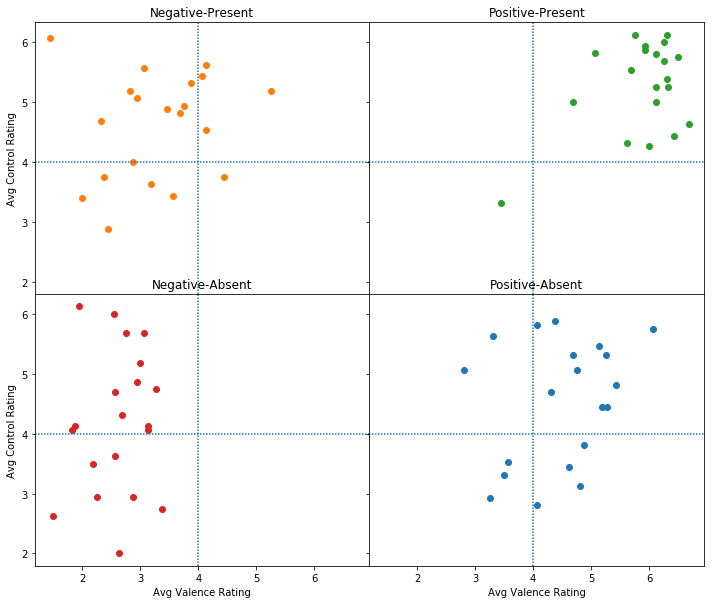

In [46]:
#create the grouped object by condition_code (valence and control conditions)
groups = pre_test_data.groupby(['condition_code'])

conditions = {'A':'Negative-Present', 'C':'Positive-Present', 'B':'Negative-Absent', 'D':'Positive-Absent'}    


fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0, 'wspace': 0},
                       figsize = (12,10))

axs[0, 0].plot(groups.get_group('A').groupby('material')["numeric_valence"].mean(), 
               groups.get_group('A').groupby('material')["numeric_control"].mean(),  'tab:orange', 
               marker="o", linestyle="")
axs[0, 0].set_title('Negative-Present')

axs[0, 1].plot(groups.get_group('C').groupby('material')["numeric_valence"].mean(), 
               groups.get_group('C').groupby('material')["numeric_control"].mean(), 'tab:green',
               marker="o", linestyle="")
axs[0, 1].set_title('Positive-Present')
axs[1, 0].plot(groups.get_group('B').groupby('material')["numeric_valence"].mean(), 
               groups.get_group('B').groupby('material')["numeric_control"].mean(),  'tab:red',
               marker="o", linestyle="")
axs[1, 0].set_title('Negative-Absent')
axs[1, 1].plot(groups.get_group('D').groupby('material')["numeric_valence"].mean(), 
               groups.get_group('D').groupby('material')["numeric_control"].mean(), 'tab:blue', 
               marker="o", linestyle="")
axs[1, 1].set_title('Positive-Absent')

for ax in axs.flat:
    ax.set(xlabel='Avg Valence Rating', ylabel='Avg Control Rating')
    
for ax in axs.flat:
    ax.axvline(x=4, dashes = (1,1))
    ax.axhline(y=4, dashes = (1,1))

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

As can be seen above, the dashed lines represent the middle of the scales (the Neutral rating), the scatter plots show just about the same as the tables of materials that meet the cut-off(s). Materials do not appear to truly cluster where they are expected to cluster except for in the Positive-Present condition. 

It can also be seen here that the valence manipulation worked much more consistently than the controllability manipulation. The majority of materials do appear to be on the expected side of neutral on the valence scale; however, the materials spread across the controllability scale in all but the Positive-Present condition.

Since the valence manipulation appears to have worked, perhaps we can use the cut-off there and a range of controllability ratings for control. However, we do not have that option in the Positive-Present condition. So, maybe we have a more and less controllable criteria, since most agreed that very few materials were actually "uncontrollable".

# Choosing a Final Set of Materials
Here, we want a set of materials that have significantly different mean ratings in positive and negative, as well as controllable and uncontrollable in the expected direction (i.e.; controllability rating is greater in the controllable than the uncontrollable). 

## When Controllability is held constant, are valence scores different?

In [47]:
#dataframe to hold the t-test info.
valence_t = pd.DataFrame(columns=["cond", 'material', 'M_pos', 'SD_pos','M_neg', 'SD_neg', 
                                            't', 'p'])
for control in ['absent','present']:
    #for each material
    for material in pre_test_data['material'].unique():

        data = pre_test_data[(pre_test_data['means_condition'] == control) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_ind(data[data['valence_condition'] == 'positive']['numeric_valence'],
                                   data[data['valence_condition'] == 'negative']['numeric_valence'], 
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(control, material, "was unable to be tested because the conditions were unequal.")


        valence_t = valence_t.append({
                #condition info
                'cond': control ,
                'material': material,

                #get means and standard deviations
                'M_pos': np.mean(data['numeric_valence'].loc[data['valence_condition'] == 'positive']),
                'SD_pos': np.std(data['numeric_valence'].loc[data['valence_condition'] == 'positive']),
                'M_neg': np.mean(data['numeric_valence'].loc[data['valence_condition'] == 'negative']),
                'SD_neg': np.std(data['numeric_valence'].loc[data['valence_condition'] == 'negative']),

                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)

valence_t['p'] = valence_t['p'].round(4)
valence_t['M_difference'] = valence_t['M_pos'] - valence_t['M_neg']

valence_t.sort_values(by=['cond','M_difference','p'], ascending=False)

,cond,material,M_pos,SD_pos,M_neg,SD_neg,t,p,M_difference
29,present,louise_shopping,5.937500,1.248437,1.437500,0.609175,12.546271,0.0000,4.500000
31,present,mary_food,6.687500,0.463512,2.375000,1.111024,13.874194,0.0000,4.312500
23,present,bill_holiday,5.625000,0.927025,2.000000,0.707107,12.041595,0.0000,3.625000
32,present,michael_breakfast,6.125000,0.599479,2.812500,0.726184,13.624123,0.0000,3.312500
36,present,sally_wine,6.250000,0.559017,2.937500,0.428478,18.214600,0.0000,3.312500
39,present,steve_gardening,6.250000,0.661438,3.062500,0.747391,12.369317,0.0000,3.187500
26,present,john_party,6.312500,0.681795,3.466667,1.203698,7.895121,0.0000,2.845833
27,present,karen_bus,6.000000,0.935414,3.187500,1.235857,7.027819,0.0000,2.812500
20,present,alan_plane,6.333333,0.699206,3.562500,0.933324,9.002060,0.0000,2.770833
24,present,bob_job,4.687500,1.102200,2.312500,0.768013,6.847125,0.0000,2.375000


N of valence pairs that meet criteria p<.05 & M_diff>0 is all of them.

In [48]:
valence_p05 = valence_t[(valence_t['p']<=0.05) & (valence_t['M_difference'] > 0 )]
print(len(valence_p05))

40


In [49]:
pre_test_data[pre_test_data['material'] == 'lucy_loan'].groupby(['valence_condition','means_condition']).count()

MQ  expt  lg  order  \
valence_condition means_condition                        
negative          absent           16    16  16     16   
                  present          16    16  16     16   
positive          absent           16    16  16     16   
                  present          16    16  16     16   

                                   surveygizmo_export_filename  Response ID  \
valence_condition means_condition                                             
negative          absent                                    16           16   
                  present                                   16           16   
positive          absent                                    16           16   
                  present                                   16           16   

                                   Time Started  Date Submitted  Status  \
valence_condition means_condition                                         
negative          absent                     16              16      16   
                  present                    16              16      16   
positive          absent                     16              16      16   
                  present                    16              16      16   

                                   Language  ...  q1  valence  \
valence_condition means_condition            ...                
negative          absent                 16  ...  16       16   
                  present                16  ...  16       16   
positive          absent                 16  ...  16       16   
                  present                16  ...  16       16   

                                   presentation_order  condition_code  subset  \
valence_condition means_condition                                               
negative          absent                           16              16      16   
                  present                          16              16      16   
positive          absent                           16              16      16   
                  present                          16              16      16   

                                   goal_step  action_step  resources_step  \
valence_condition means_condition                                           
negative          absent                  16           16              16   
                  present                 16           16              16   
positive          absent                  16           16              16   
                  present                 16           16              16   

                                   numeric_valence  numeric_control  
valence_condition means_condition                                    
negative          absent                        16               16  
                  present                       16               16  
positive          absent                        16               16  
                  present                       16               16  

[4 rows x 24 columns]

## When Valence is held constant, what is the difference between the Controllable and Uncontrollable?
That is, are controllable and uncontrollable significantly different within the Negative valence condition
Also, are controllable and uncontrollable significantly different within the Positive valence condition

In [50]:
#dataframe to hold the t-test info.
control_t = pd.DataFrame(columns=["cond", 'material', 'M_present', 'SD_present', 'M_absent', 'SD_absent', 
                                            't', 'p'])
for valence in ['negative','positive']:
    #for each material
    for material in pre_test_data['material'].unique():

        data = pre_test_data[(pre_test_data['valence_condition'] == valence) & \
                             (pre_test_data['material'] == material)]

        #get paired t-test statistics and p-values
        try:
            t, p = stats.ttest_ind(data[data['means_condition'] == 'present']['numeric_control'],
                                   data[data['means_condition'] == 'absent']['numeric_control'], 
                                   # omit missing values
                                   nan_policy = 'omit')
        except ValueError:  # 
            t, p = (-9999, -9999)
            #print(data['numeric_valence'].isna())
            print(valence, material, "was unable to be tested because the conditions were unequal.")


        control_t = control_t.append({
                #condition info
                'cond': valence ,
                'material': material,

                #get means and standard deviations
                'M_present': np.mean(data['numeric_control'].loc[data['means_condition'] == 'present']),
                'SD_present': np.std(data['numeric_control'].loc[data['means_condition'] == 'present']),
                'M_absent': np.mean(data['numeric_control'].loc[data['means_condition'] == 'absent']),
                'SD_absent': np.std(data['numeric_control'].loc[data['means_condition'] == 'absent']),

                # input t and p
                't': t,
                'p': p
            }, ignore_index = True)

control_t['p'] = control_t['p'].round(4)
control_t['M_difference'] = control_t['M_present'] - control_t['M_absent']

control_t.sort_values(by=['cond','M_difference','p'], ascending=False)

,cond,material,M_present,SD_present,M_absent,SD_absent,t,p,M_difference
36,positive,sally_wine,5.687500,1.157516,3.437500,1.367879,4.863089,0.0000,2.250000
34,positive,rebecca_swimming,4.437500,1.367879,2.812500,1.333171,3.294925,0.0025,1.625000
23,positive,bill_holiday,4.312500,1.260890,3.125000,1.408678,2.432701,0.0212,1.187500
38,positive,sean_call,5.000000,1.224745,3.812500,1.285435,2.590374,0.0147,1.187500
31,positive,mary_food,4.625000,1.494783,3.533333,1.586050,1.908180,0.0663,1.091667
32,positive,michael_breakfast,5.800000,1.045626,4.812500,1.285435,2.260731,0.0315,0.987500
27,positive,karen_bus,4.266667,1.436044,3.312500,1.260890,1.904236,0.0668,0.954167
22,positive,belinda_meeting,5.375000,1.053269,4.437500,1.273222,2.197345,0.0359,0.937500
37,positive,sam_driving,5.533333,0.956847,4.687500,1.569982,1.738088,0.0928,0.845833
30,positive,lucy_loan,5.250000,1.198958,4.437500,1.116286,1.920926,0.0643,0.812500


In [51]:
control_p05 = control_t[(control_t['p']<=0.05) & (control_t['M_difference'] > 0 )]
print(len(control_p05))
control_p05

12


,cond,material,M_present,SD_present,M_absent,SD_absent,t,p,M_difference
2,negative,belinda_meeting,4.533333,1.024153,2.9375,1.197328,3.845205,0.0006,1.595833
10,negative,lucy_loan,5.625000,1.165922,4.0625,1.390537,3.334816,0.0023,1.562500
14,negative,rebecca_swimming,3.750000,1.750000,2.0000,0.707107,3.590924,0.0012,1.750000
16,negative,sally_wine,5.062500,0.826797,4.0625,1.559998,2.193634,0.0361,1.000000
18,negative,sean_call,5.437500,0.863767,2.7500,0.750000,9.098958,0.0000,2.687500
22,positive,belinda_meeting,5.375000,1.053269,4.4375,1.273222,2.197345,0.0359,0.937500
23,positive,bill_holiday,4.312500,1.260890,3.1250,1.408678,2.432701,0.0212,1.187500
32,positive,michael_breakfast,5.800000,1.045626,4.8125,1.285435,2.260731,0.0315,0.987500
33,positive,peter_college,5.812500,0.726184,5.0625,1.028880,2.306555,0.0282,0.750000
34,positive,rebecca_swimming,4.437500,1.367879,2.8125,1.333171,3.294925,0.0025,1.625000


In [52]:
expct_dir_control = control_t[control_t['M_difference'] > 0].sort_values(by=['material','cond','M_difference','p'], ascending=True)
print(len(expct_dir_control))
expct_dir_control

30


,cond,material,M_present,SD_present,M_absent,SD_absent,t,p,M_difference
21,positive,anna_interview,5.937500,0.747391,5.312500,1.569982,1.392115,0.1741,0.625000
2,negative,belinda_meeting,4.533333,1.024153,2.937500,1.197328,3.845205,0.0006,1.595833
22,positive,belinda_meeting,5.375000,1.053269,4.437500,1.273222,2.197345,0.0359,0.937500
3,negative,bill_holiday,3.400000,1.451436,2.625000,1.452369,1.436490,0.1616,0.775000
23,positive,bill_holiday,4.312500,1.260890,3.125000,1.408678,2.432701,0.0212,1.187500
4,negative,bob_job,4.687500,0.845484,4.125000,1.316957,1.392049,0.1741,0.562500
6,negative,john_party,4.875000,1.218349,4.133333,1.586050,1.417274,0.1671,0.741667
26,positive,john_party,6.125000,0.695971,5.750000,0.661438,1.512658,0.1408,0.375000
7,negative,karen_bus,3.625000,1.494783,3.500000,1.172604,0.254824,0.8006,0.125000
27,positive,karen_bus,4.266667,1.436044,3.312500,1.260890,1.904236,0.0668,0.954167


In [53]:
expct_dir_p_control = control_t[
    (
        (control_t['M_difference'] > 0) & (control_t['p'] <= 0.2)
    ) |
    (control_t['M_difference'] > 0.30)
                               ].sort_values(by=['material','cond','M_difference','p'], ascending=True)
print(len(expct_dir_p_control))
expct_dir_p_control

25


,cond,material,M_present,SD_present,M_absent,SD_absent,t,p,M_difference
21,positive,anna_interview,5.937500,0.747391,5.312500,1.569982,1.392115,0.1741,0.625000
2,negative,belinda_meeting,4.533333,1.024153,2.937500,1.197328,3.845205,0.0006,1.595833
22,positive,belinda_meeting,5.375000,1.053269,4.437500,1.273222,2.197345,0.0359,0.937500
3,negative,bill_holiday,3.400000,1.451436,2.625000,1.452369,1.436490,0.1616,0.775000
23,positive,bill_holiday,4.312500,1.260890,3.125000,1.408678,2.432701,0.0212,1.187500
4,negative,bob_job,4.687500,0.845484,4.125000,1.316957,1.392049,0.1741,0.562500
6,negative,john_party,4.875000,1.218349,4.133333,1.586050,1.417274,0.1671,0.741667
26,positive,john_party,6.125000,0.695971,5.750000,0.661438,1.512658,0.1408,0.375000
27,positive,karen_bus,4.266667,1.436044,3.312500,1.260890,1.904236,0.0668,0.954167
28,positive,katie_kitten,3.312500,1.356408,2.933333,0.771722,0.917177,0.3666,0.379167


In [54]:
len(expct_dir_p_control[expct_dir_p_control['p']<=0.05])

12

In [55]:
len(expct_dir_p_control[expct_dir_p_control['p']<=0.1])


16

In [56]:
len(expct_dir_p_control[expct_dir_p_control['p']<=0.2])

21

### Find Matching Pairs
We need a set of matched pairs to run an experiment. Find the materials that meet the criteria in all 4 conditions.

In [57]:
control_mats_appear_twice = expct_dir_p_control['material'].value_counts()[expct_dir_p_control['material'].value_counts()==2].index.tolist()
control_mats_appear_twice

['sally_wine',
 'lucy_loan',
 'bill_holiday',
 'john_party',
 'sean_call',
 'belinda_meeting',
 'rebecca_swimming',
 'michael_breakfast']

In [58]:
control_correct_dir_doubles = control_t[(control_t['M_difference'] > 0) &
                              (control_t['material'].isin(control_mats_appear_twice))
                             ].sort_values(by=['material','cond','M_difference','p'], ascending=True)
print(len(control_correct_dir_doubles))
control_correct_dir_doubles =control_correct_dir_doubles.reset_index(drop=True)
control_correct_dir_doubles

16


,cond,material,M_present,SD_present,M_absent,SD_absent,t,p,M_difference
0,negative,belinda_meeting,4.533333,1.024153,2.937500,1.197328,3.845205,0.0006,1.595833
1,positive,belinda_meeting,5.375000,1.053269,4.437500,1.273222,2.197345,0.0359,0.937500
2,negative,bill_holiday,3.400000,1.451436,2.625000,1.452369,1.436490,0.1616,0.775000
3,positive,bill_holiday,4.312500,1.260890,3.125000,1.408678,2.432701,0.0212,1.187500
4,negative,john_party,4.875000,1.218349,4.133333,1.586050,1.417274,0.1671,0.741667
5,positive,john_party,6.125000,0.695971,5.750000,0.661438,1.512658,0.1408,0.375000
6,negative,lucy_loan,5.625000,1.165922,4.062500,1.390537,3.334816,0.0023,1.562500
7,positive,lucy_loan,5.250000,1.198958,4.437500,1.116286,1.920926,0.0643,0.812500
8,negative,michael_breakfast,5.187500,1.184206,4.866667,1.454495,0.653161,0.5188,0.320833
9,positive,michael_breakfast,5.800000,1.045626,4.812500,1.285435,2.260731,0.0315,0.987500


In [59]:
len(control_correct_dir_doubles[control_correct_dir_doubles['p']<=0.05])/16

0.6875

In [60]:
len(control_correct_dir_doubles[control_correct_dir_doubles['p']<=0.1])/16

0.75

In [61]:
len(control_correct_dir_doubles[control_correct_dir_doubles['p']<=0.2])/16

0.9375

In [62]:
control_correct_dir_doubles.describe()

,M_present,SD_present,M_absent,SD_absent,t,p,M_difference
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,4.991146,1.155593,3.753906,1.239339,2.915201,0.074913,1.237240
std,0.745932,0.252043,1.000751,0.291040,1.966052,0.132066,0.643582
min,3.400000,0.695971,2.000000,0.661438,0.653161,0.000000,0.320833
25%,4.509375,1.040258,2.906250,1.177067,1.818859,0.002025,0.803125
50%,5.125000,1.175064,3.937500,1.309303,2.346716,0.026350,1.093750
75%,5.484375,1.233781,4.437500,1.419601,3.398843,0.083425,1.603125
max,6.125000,1.750000,5.750000,1.586050,9.098958,0.518800,2.687500


# Significant Differences in Final Set?

In [63]:
final_set_mats = control_correct_dir_doubles['material'].unique().tolist()
final_set_mats

['belinda_meeting',
 'bill_holiday',
 'john_party',
 'lucy_loan',
 'michael_breakfast',
 'rebecca_swimming',
 'sally_wine',
 'sean_call']

In [64]:
final_mats_scores = pre_test_data[
    pre_test_data['material'].isin(final_set_mats)
].groupby(['material','valence_condition','means_condition'])[
    ['numeric_valence','numeric_control']
].mean().reset_index()
final_mats_scores[final_mats_scores['material']=='lucy_loan']

,material,valence_condition,means_condition,numeric_valence,numeric_control
12,lucy_loan,negative,absent,3.1250,4.0625
13,lucy_loan,negative,present,4.1250,5.6250
14,lucy_loan,positive,absent,5.1875,4.4375
15,lucy_loan,positive,present,6.1250,5.2500


In [65]:
final_mats_scores.groupby('valence_condition')['numeric_valence'].describe()

,count,mean,std,min,25%,50%,75%,max
valence_condition,,,,,,,,
negative,16.0,3.083854,0.851003,1.5000,2.765625,3.031250,3.615625,4.4375
positive,16.0,5.602865,0.728119,4.0625,5.109375,5.845833,6.156250,6.4375


In [66]:
final_mats_scores.groupby('means_condition')['numeric_control'].describe()

,count,mean,std,min,25%,50%,75%,max
means_condition,,,,,,,,
absent,16.0,3.753906,1.000751,2.0,2.906250,3.9375,4.437500,5.750
present,16.0,4.991146,0.745932,3.4,4.509375,5.1250,5.484375,6.125


In [67]:
final_mats_scores.groupby(['valence_condition','means_condition'])['numeric_valence'].describe()

count      mean       std     min  \
valence_condition means_condition                                      
negative          absent             8.0  2.671875  0.668779  1.5000   
                  present            8.0  3.495833  0.846556  2.0000   
positive          absent             8.0  5.041667  0.596642  4.0625   
                  present            8.0  6.164062  0.245353  5.6250   

                                        25%       50%       75%       max  
valence_condition means_condition                                          
negative          absent           2.421875  2.906250  3.125000  3.375000  
                  present          2.906250  3.764583  4.125000  4.437500  
positive          absent           4.765625  5.031250  5.309375  6.066667  
                  present          6.125000  6.187500  6.312500  6.437500

In [68]:
final_mats_scores.groupby(['valence_condition','means_condition'])['numeric_control'].describe()

count      mean       std     min  \
valence_condition means_condition                                      
negative          absent             8.0  3.429688  0.982466  2.0000   
                  present            8.0  4.733854  0.793755  3.4000   
positive          absent             8.0  4.078125  0.969829  2.8125   
                  present            8.0  5.248437  0.641059  4.3125   

                                        25%      50%       75%       max  
valence_condition means_condition                                         
negative          absent           2.718750  3.50000  4.080208  4.866667  
                  present          4.337500  4.96875  5.250000  5.625000  
positive          absent           3.359375  4.12500  4.531250  5.750000  
                  present          4.859375  5.31250  5.715625  6.125000

## t-Test of Differences Between the Four Conditions

In [69]:
t_control_neg, p_control_neg = stats.ttest_ind(
    final_mats_scores[(final_mats_scores['means_condition'] == 'present')
                      & (final_mats_scores['valence_condition'] == 'negative')]
    ['numeric_control'],
    final_mats_scores[(final_mats_scores['means_condition'] == 'absent')
                      & (final_mats_scores['valence_condition'] == 'negative')]
    ['numeric_control'],
    # omit missing values
    nan_policy='omit')
print("{:.3f}".format(t_control_neg), "{:.3f}".format(p_control_neg))

2.921 0.011


In [70]:
t_control_pos, p_control_pos = stats.ttest_ind(
    final_mats_scores[(final_mats_scores['means_condition'] == 'present')
                      & (final_mats_scores['valence_condition'] == 'positive')]
    ['numeric_control'],
    final_mats_scores[(final_mats_scores['means_condition'] == 'absent')
                      & (final_mats_scores['valence_condition'] == 'positive')]
    ['numeric_control'],
    # omit missing values
    nan_policy='omit')
print("{:.3f}".format(t_control_pos), "{:.3f}".format(p_control_pos))

2.847 0.013


There is a significant difference between the mean perceived controllability of each material in the negative controllable and negative uncontrollable conditions.

Likewise, there is a significant difference between the mean perceived controllability of each material in the positive controllable and positive uncontrollable conditions.

In [71]:
t_valence_abs, p_valence_abs = stats.ttest_ind(
    final_mats_scores[(final_mats_scores['means_condition'] == 'absent')
                      & (final_mats_scores['valence_condition'] == 'positive')]
    ['numeric_valence'],
    final_mats_scores[(final_mats_scores['means_condition'] == 'absent')
                      & (final_mats_scores['valence_condition'] == 'negative')]
    ['numeric_valence'],
    # omit missing values
    nan_policy='omit')
print("{:.3f}".format(t_valence_abs), "{:.3f}".format(p_valence_abs))

7.479 0.000


In [72]:
t_valence_pres, p_valence_pres = stats.ttest_ind(
    final_mats_scores[(final_mats_scores['means_condition'] == 'present')
                      & (final_mats_scores['valence_condition'] == 'positive')]
    ['numeric_valence'],
    final_mats_scores[(final_mats_scores['means_condition'] == 'present')
                      & (final_mats_scores['valence_condition'] == 'negative')]
    ['numeric_valence'],
    # omit missing values
    nan_policy='omit')
print("{:.3f}".format(t_valence_pres), "{:.3f}".format(p_valence_pres))

8.562 0.000


There is a significant difference between the mean perceived valence of each material in the positive uncontrollable and negative uncontrollable conditions.

There is a significant difference between the mean perceived valence of each material in the positive controllable and negative controllable conditions.